In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")

In [4]:
import matplotlib
#matplotlib.style.use("dark_background")
matplotlib.style.use("default")

# Persamaan Kalor 1d

Dalam satu dimensi spasial (misalkan x).

$$
\alpha \frac{\partial^{2}}{\partial x^2} u(x,t) = \frac{\partial}{\partial t} u(x,t)
$$

Domain:
- spasial: $0 \leq x \leq x_{f}$
- temporal: $0 \leq t \leq t_{f}$.

Syarat batas:
- $u(0,t) = b_{0}(t)$
- $u(x_{f},t) = b_{x_f}(t)$

Syarat awal:
- $u(x,0) = u_{0}(x)$ 

Catatan: persamaan yang sama juga digunakan untuk menjelaskan fenomena difusi.

## Metode Euler Eksplisit

Domain spasial dibagi menjadi $N_{x}$ segmen dengan $\Delta x = x_{f}/N_{x}$.

Domain temporal dibagi menjadi $N_{t}$ segmen dengan $\Delta t = t_{f}/N_{t}$.

Turunan parsial kedua terhadap $x$ diaproksimasi dengan menggunakan central difference.

Turunan parsial pertama terhadap $t$ diaproksimasi dengan forward difference.

Dengan menggunakan notasi berikut:
- $u(x,t) = u^{k}_{i}$
- $u(x+\Delta x,t) = u^{k}_{i+1}$
- $u(x-\Delta x,t) = u^{k}_{i-1}$
- $u(x,t+\Delta t) = u^{k+1}_{i}$
- $u(x,t-\Delta t) = u^{k-1}_{i}$

dapat dituliskan:

$$
\alpha \frac{u^{k}_{i+1} - 2u^{k}_{i} + u^{k}_{i-1}}{(\Delta x)^2}
=
\frac{u^{k+1}_{i} - u^{k}_{i}}{\Delta t}
$$

Dengan menggunakan defisi:
$$
r = \alpha \frac{\Delta t}{(\Delta x)^2}
$$

Persamaan ini dapat dipecahkan untuk mendapatkan $u^{k+1}_{i}$
$$
u^{k+1}_{i} = r \left( u^{k}_{i+1} + u^{k}_{i-1} \right) + (1 - 2r) u^{k}_{i} 
$$
untuk $i = 1, 2, \ldots, N_{x}-1$.

Dapat ditunjukkan bahwa skema ini akan stabil jika:
$$
r = \alpha \frac{\Delta t}{(\Delta x)^2} \leq \frac{1}{2}
$$

### Implementasi

In [6]:
def heat_1d_euler_exp( alpha, xf, tf, u0x, bx0, bxf, Nx, Nt ):

    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)

    u = np.zeros( (Nx+1, Nt+1) ) 

    # Aplikasi syarat awal
    for i in range(Nx+1):
        u[i,0] = u0x( x[i] )
    
    # Syarat batas
    for k in range(Nt+1):
        u[0,k] = bx0( t[k] )
        u[i,k] = bxf( t[k] )
    
    r = alpha*dt/dx**2
    
    if r > 0.5:
        print("heat_1d_euler_exp:")
        print("WARNING: r lebih besar dari 0.5: %f\n" % r)
        print("WARNING: solusi tidak stabil !!")
    else:
        print("heat_1d_euler_exp:")
        print("r = %f >= 0.5\n" % r)
        print("Solusi seharusnya stabil")

    for k in range(0,Nt):
        for i in range(1,Nx):
            u[i,k+1] = r*( u[i+1,k] + u[i-1,k] ) + (1 - 2*r)*u[i,k]
    
    return u, x, t

### Contoh

Cari solusi numerik persamaan kalor:
$$
\frac{\partial^{2}}{\partial x^2} u(x,t) = \frac{\partial}{\partial t} u(x,t)
$$

pada domain:
- spasial: $0 \leq x \leq 1$
- temporal: $0 \leq t \leq 0.1$.

Syarat batas:
- $u(0,t) = 0$
- $u(1,t) = 0$

Syarat awal:
- $u(x,0) = \sin(\pi x)$ 

In [7]:
# Syarat awal
def initial_temp( x ):
    return np.sin(np.pi*x)
# Syarat batas kiri
def bx0( t ):
    return 0.0
# Syarat batas kanan
def bxf( t ):
    return 0.0

In [28]:
def sol_01_analitik(x,t):
    return np.sin(np.pi*x)*np.exp(-np.pi**2 * t)

In [36]:
alpha = 1.0

xf = 1
Nx = 25

tf = 0.1
Nt = 200

u_exp, x, t = heat_1d_euler_exp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

heat_1d_euler_exp:
r = 0.312500 >= 0.5

Solusi seharusnya stabil


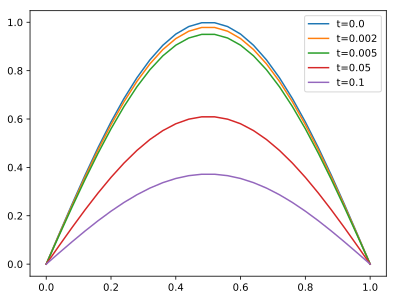

In [37]:
plt.clf()
plt.plot(x, u_exp[:,0], label="t="+str(t[0]))
plt.plot(x, u_exp[:,4], label="t="+str(t[4]))
plt.plot(x, u_exp[:,10], label="t="+str(t[10]))
plt.plot(x, u_exp[:,100], label="t="+str(t[100]))
plt.plot(x, u_exp[:,-1], label="t="+str(t[-1]))
plt.legend();

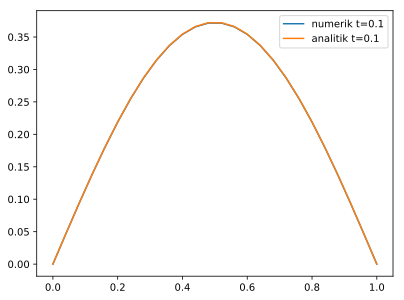

In [38]:
plt.clf()
plt.plot(x, u_exp[:,-1], label="numerik t="+str(t[-1]))
plt.plot(x, sol_01_analitik(x, t[-1]), label="analitik t="+str(t[-1]))
plt.legend();

## Metode Euler implisit

Domain spasial dibagi menjadi $N_{x}$ segmen dengan $\Delta x = x_{f}/N_{x}$.

Domain temporal dibagi menjadi $N_{t}$ segmen dengan $\Delta t = t_{f}/N_{t}$.

Turunan parsial kedua terhadap $x$ diaproksimasi dengan menggunakan central difference.

Turunan parsial pertama terhadap $t$ diaproksimasi dengan backward difference.

$$
\alpha \frac{u^{k}_{i+1} - 2u^{k}_{i} + u^{k}_{i-1}}{(\Delta x)^2}
=
\frac{u^{k}_{i} - u^{k-1}_{i}}{\Delta t}
$$

Dengan menggunakan notasi:
$$
r = \alpha \frac{\Delta t}{(\Delta x)^2}
$$

Diperoleh persamaan implisit:
$$
-ru^{k}_{i-1}+ (1 + 2r)u^{k}_{i} - ru^{k}_{i+1} = u^{k-1}_{i}
$$
untuk $i = 1, 2, \ldots, N_{x}-1$.

Dalam bentuk matriks:
$$
\begin{bmatrix}
1 + 2r & -r & 0 & \cdot & 0 & 0 \\
-r & 1 + 2r & -r & \cdot & 0 & 0 \\
0 & -r & 1 + 2r & \cdot & 0 & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
0 & 0 & 0 & \cdot & 1 + 2r & -r \\
0 & 0 & 0 & \cdot & -r & 1 + 2r
\end{bmatrix}
\begin{bmatrix}
u^{k}_{1} \\
u^{k}_{2} \\
u^{k}_{3} \\
\cdot \\
u^{k}_{N_{x}-2} \\
u^{k}_{N_{x}-1}
\end{bmatrix} = 
\begin{bmatrix}
u^{k-1}_{1} + ru^{k}_{0} \\
u^{k-1}_{2} \\
u^{k-1}_{3} \\
\cdot \\
u^{k-1}_{N_{x}-2} \\
u^{k-1}_{N_{x}-1} + ru^{k}_{N_{x}}
\end{bmatrix}
$$

### Implementasi

Dalam kode di bawah ini akan didefinisikan matriks $\mathbf{A}$ sebagai matriks koefisien pada ruas kiri dan vektor $\mathbf{b}$ pada ruas kanan.

In [10]:
def heat_1d_euler_imp( alpha, xf, tf, u0x, bx0, bxf, Nx, Nt ):
    
    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)

    u = np.zeros( (Nx+1, Nt+1) ) 

    # Aplikasi syarat awal
    for i in range(Nx+1):
        u[i,0] = u0x( x[i] )
    
    # Syarat batas
    for k in range(Nt+1):
        u[0,k] = bx0( t[k] )
        u[Nx,k] = bxf( t[k] )
    
    r = alpha*dt/dx**2
    
    # Bangun matriks A
    A = np.zeros( (Nx-1,Nx-1) )
    for i in range(Nx-1):
        A[i,i] = 1 + 2*r
        if i > 0:
            A[i-1,i] = -r
            A[i,i-1] = -r
    
    # Bangun vektor b
    b = np.zeros(Nx-1)
    for k in range(1,Nt+1):
        b = np.copy(u[1:Nx,k-1])
        b[0] = b[0] + r*u[0,k]
        b[Nx-2] = b[Nx-2] + r*u[Nx,k]
        # Selesaikan sistem persamaan linear
        u[1:Nx,k] = np.linalg.solve(A, b)
    
    return u, x, t

### Contoh

In [20]:
alpha = 1.0

xf = 1.0
Nx = 25

tf = 0.1
Nt = 200

u_imp, x, t = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

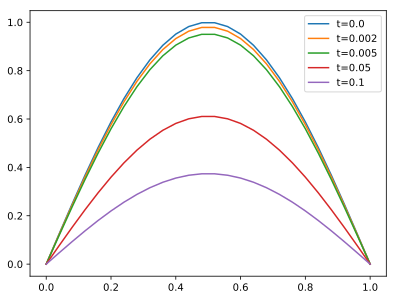

In [21]:
plt.clf()
plt.plot(x, u_imp[:,0], label="t="+str(t[0]))
plt.plot(x, u_imp[:,4], label="t="+str(t[4]))
plt.plot(x, u_imp[:,10], label="t="+str(t[10]))
plt.plot(x, u_imp[:,100], label="t="+str(t[100]))
plt.plot(x, u_imp[:,-1], label="t="+str(t[-1]))
plt.legend();

## Metode Crank-Nicholson

Metode Crank-Nicholson diperoleh dengan menggunakan rata-rata aproksimasi central difference antara titik waktu $k + 1$ dan $k$ sehingga diperoleh:

$$
\frac{\alpha}{2} \left(
\frac{u^{k+1}_{i+1} - 2u^{k+1}_{i} + u^{k+1}_{i-1}}{(\Delta x)^2} +
\frac{u^{k}_{i+1} - 2u^{k}_{i} + u^{k}_{i-1}}{(\Delta x)^2}
\right) = 
\frac{u^{k+1}_{i} - u^{k}_{i}}{\Delta t}
$$

atau:
$$
ru^{k+1}_{i+1} - 2ru^{k+1}_{i} + ru^{k+1}_{i-1} + ru^{k}_{i+1} - 2ru^{k}_{i} + ru^{k}_{i-1} = 2u^{k+1}_{i} - 2u^{k}_{i}
$$

$$
-ru^{k+1}_{i+1} + 2(1 + r)u^{k+1}_{i} - ru^{k+1}_{i-1} = ru^{k}_{i+1} + 2(1 - r)u^{k}_{i} + ru^{k}_{i-1}
$$

Dalam bentuk matriks:
$$
\mathbf{A}\mathbf{u}^{k+1} = \mathbf{B}\mathbf{u}^{k}
$$

dengan matriks sebagai berikut.

$$
\mathbf{A} = 
\begin{bmatrix}
2(1 + r) & -r & 0 & \cdot & 0 & 0 \\
-r & 2(1 + r) & -r & \cdot & 0 & 0 \\
0 & -r & 2(1 + r) & \cdot & 0 & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
0 & 0 & 0 & \cdot & 2(1 + r) & -r \\
0 & 0 & 0 & \cdot & -r & 2(1 + r)
\end{bmatrix}
$$

$$
\mathbf{B} = 
\begin{bmatrix}
2(1 - r) & r & 0 & \cdot & 0 & 0 \\
r & 2(1 - r) & r & \cdot & 0 & 0 \\
0 & r & 2(1 - r) & \cdot & 0 & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
0 & 0 & 0 & \cdot & 2(1 - r) & r \\
0 & 0 & 0 & \cdot & r & 2(1 - r)
\end{bmatrix}
$$

$$
\mathbf{u}^{k} =
\begin{bmatrix}
u^{k}_{1} \\
u^{k}_{2} \\
u^{k}_{3} \\
\cdot \\
u^{k}_{M-1} \\
u^{k}_{M}
\end{bmatrix}
$$


### Implementasi

In [23]:
def heat_1d_CN( alpha, xf, tf, u0x, bx0, bxf, Nx, Nt ):
    
    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)

    u = np.zeros( (Nx+1, Nt+1) ) 

    # Aplikasi syarat awal
    for i in range(Nx+1):
        u[i,0] = u0x( x[i] )
    
    # Syarat batas
    for k in range(Nt+1):
        u[0,k] = bx0( t[k] )
        u[Nx,k] = bxf( t[k] )
    
    r = alpha*dt/dx**2
    
    A = np.zeros( (Nx-1,Nx-1) )
    for i in range(Nx-1):
        A[i,i] = 2*(1 + r)
        if i > 0:
            A[i-1,i] = -r
            A[i,i-1] = -r

    B = np.zeros( (Nx-1,Nx-1) )
    for i in range(Nx-1):
        B[i,i] = 2*(1 - r)
        if i > 0:
            B[i-1,i] = r
            B[i,i-1] = r
    
    for k in range(1,Nt+1):
        b = np.matmul(B, u[1:Nx,k-1] )
        u[1:Nx,k] = np.linalg.solve(A, b)
    
    return u, x, t

### Contoh

In [17]:
alpha = 1.0

xf = 1.0
Nx = 25

tf = 0.1
Nt = 200

u_CN, x, t = heat_1d_CN( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

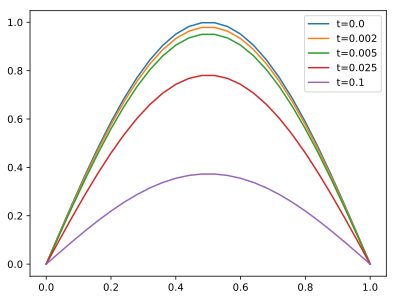

In [18]:
plt.clf()
plt.plot(x, u_CN[:,0], label="t="+str(t[0]))
plt.plot(x, u_CN[:,4], label="t="+str(t[4]))
plt.plot(x, u_CN[:,10], label="t="+str(t[10]))
plt.plot(x, u_CN[:,50], label="t="+str(t[50]))
plt.plot(x, u_CN[:,-1], label="t="+str(t[-1]))
plt.legend();

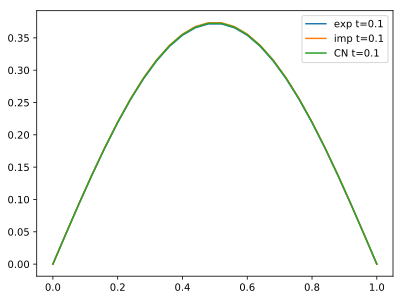

In [22]:
plt.clf()
plt.plot(x, u_exp[:,-1], label="exp t="+str(t[-1]))
plt.plot(x, u_imp[:,-1], label="imp t="+str(t[-1]))
plt.plot(x, u_CN[:,-1], label="CN t="+str(t[-1]))
plt.legend();

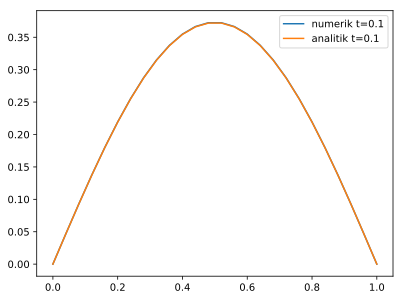

In [39]:
plt.clf()
plt.plot(x, u_CN[:,-1], label="numerik t="+str(t[-1]))
plt.plot(x, sol_01_analitik(x, t[-1]), label="analitik t="+str(t[-1]))
plt.legend();

# Persamaan kalor 2d

$$
\alpha \left( \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} \right) u(x,y,t)
= \frac{\partial}{\partial t} u(x,y,t)
$$

$$
\alpha \left(
\frac{u^{k}_{i,j+1} - 2u^{k}_{i,j} + u^{k}_{i-1,j}}{(\Delta x)^2} +
\frac{u^{k}_{i,j+1} - 2u^{k}_{i,j} + u^{k}_{i,j-1}}{(\Delta y)^2}
\right) = 
\frac{u^{k+1}_{i} - u^{k}_{i}}{\Delta t}
$$

# Old (kuliah 14 April 2019)

Rentang x = 0 sampai dengan x = 1, dengan selang diskritisasi h = 0.25

In [4]:
h = 0.25
A = 0.0
B = 1.0
Nx = int( (B-A)/h ) + 1
Nx

5

In [6]:
x = np.linspace(A,B, Nx)
x

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Waktu t = 0 sampai dengan t = 1, dengan selang k = 0.25

In [33]:
k = 0.025
tmin = 0.0
tmax = 1.0
Nt = int( (tmax-tmin)/k ) + 1
Nt

41

Array suhu, dua dimensi

In [35]:
T = np.zeros( (Nx,Nt) )

Aplikasi syarat batas t = 0 (atau syarat awal)

$$
T(x, t=0) = \sin(\pi x )
$$

In [37]:
T[:,0] = np.sin(np.pi * x)

Text(0.0, 1.0, 't = 0')

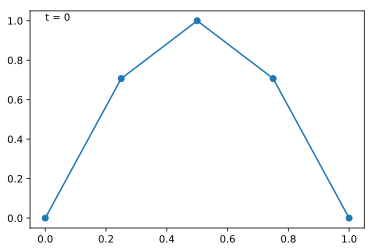

In [38]:
plt.clf()
plt.plot(x, T[:,0], marker="o")
plt.text( 0.0, 1.0, "t = 0")

Metode eksplisit
$$
T(x,t+k) = \lambda T(x-h,t) + (1-2\lambda)*T(x,t) + \lambda T(x+h,t)
$$


In [39]:
λ = k/h**2
λ

0.4

Mulai time-stepping dari t = 0 ke t selanjutnya t = 0 + k = k

In [42]:
# T[i,t] adalah T[xi,t]
idx_time = 1
for i in range(1,Nx-1):
    T[i,idx_time] = λ*T[i-1,idx_time-1] - (1 - 2*λ)*T[i,idx_time-1] + λ*T[i+1,idx_time-1]

Text(0.0, 0.9, 't = 0.025')

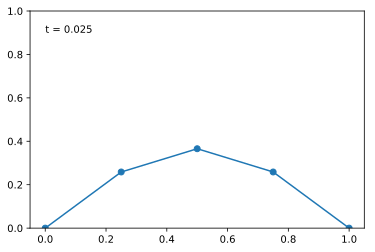

In [45]:
plt.clf()
plt.plot(x, T[:,idx_time], marker="o")
plt.ylim(0,1)
plt.text( 0.0, 0.9, "t = 0.025")

In [46]:
# T[i,t] adalah T[xi,t]
idx_time = 2
for i in range(1,Nx-1):
    T[i,idx_time] = λ*T[i-1,idx_time-1] - (1 - 2*λ)*T[i,idx_time-1] + λ*T[i+1,idx_time-1]

Text(0.0, 0.9, 't = 0.05')

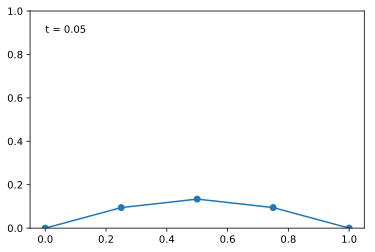

In [47]:
plt.clf()
plt.plot(x, T[:,idx_time], marker="o")
plt.ylim(0,1)
plt.text( 0.0, 0.9, "t = 0.05")

Untuk semua waktu, gunakan loop

In [52]:
for idx_time in range(1,Nt):
    for i in range(1,Nx-1):
        T[i,idx_time] = λ*T[i-1,idx_time-1] - (1 - 2*λ)*T[i,idx_time-1] + λ*T[i+1,idx_time-1]

Misalkan kita ingin mengetahui distribusi suhu pada t = 0.5, atau indeks t = 20

In [55]:
t = k*20
t

0.5

Text(0.0, 0.9, 't = 0.5')

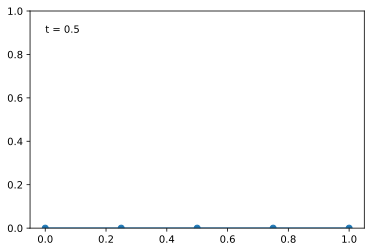

In [56]:
plt.clf()
plt.plot(x, T[:,20], marker="o")
plt.ylim(0,1)
plt.text( 0.0, 0.9, "t = 0.5")

Text(0.0, 0.9, 't = 0.25')

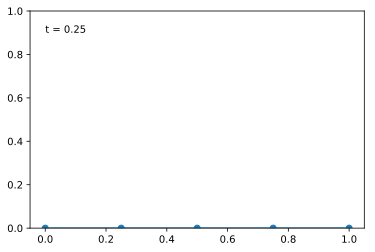

In [57]:
plt.clf()
plt.plot(x, T[:,10], marker="o")
plt.ylim(0,1)
plt.text( 0.0, 0.9, "t = 0.25")

In [74]:
def my_gaussian(x, center, alpha):
    return np.exp( -alpha*(x - center)**2 )

Nx =  21
Nt =  1001


Text(0, 0.9, 't = 0')

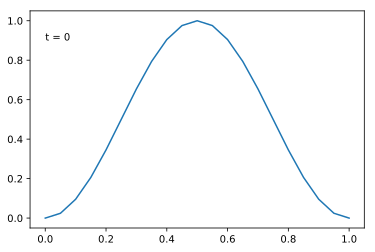

In [114]:
h = 0.05
A = 0.0
B = 1.0
center = 0.5
alpha = 1000
Nx = int( (B-A)/h ) + 1
print("Nx = ", Nx)
x = np.linspace(A, B, Nx)

k = 0.001
tmin = 0.0
tmax = 1.0
Nt = int( (tmax-tmin)/k ) + 1
print("Nt = ", Nt)

t = np.linspace(tmin, tmax, Nt)

T = np.zeros( (Nx,Nt) )

# Syarat awal
T[:,0] = np.sin(np.pi*x)**2

plt.clf()
plt.plot(x, T[:,0])
plt.text(0, 0.9, "t = 0")

In [117]:
λ = k/h**2
print("λ = ", λ)

for idx_time in range(1,Nt):
    for i in range(1,Nx-1):
        T[i,idx_time] = λ*T[i-1,idx_time-1] - (1 - 2*λ)*T[i,idx_time-1] + λ*T[i+1,idx_time-1]

λ =  0.3999999999999999


Text(0, 0.9, 't = 0.0001')

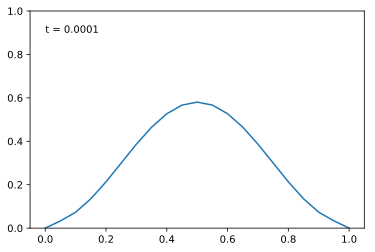

In [119]:
plt.clf()
plt.plot(x, T[:,1])
plt.ylim(0,1)
plt.text(0, 0.9, "t = 0.0001")

In [110]:
my_gaussian(0.0, center, alpha)

2.6691902155412764e-109